# Importando as Bibliotecas e Examinando os Df

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
#Importando e visualizando meu dataframe
df = pd.read_csv('Power_Plant.csv')

print(df.head(), end="\n\n")
print(df.info())
# PE = Y

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None


In [54]:
# Renomeando as colunas para melhor entendimento dos dados
df = df.rename(columns={'AT': 'Temperatura', 'V': 'Pressão do Ar','RH': 'Umidade do Ar','AP': 'Pressão ATM','PE': 'Energia Produzida',})
df.head()

,Temperatura,Pressão do Ar,Pressão ATM,Umidade do Ar,Energia Produzida
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [55]:
# Análisando a correlação das demais colunas com a 'Energia Produzida'
corr = df.corr()
corr['Energia Produzida']

Temperatura         -0.948128
Pressão do Ar       -0.869780
Pressão ATM          0.518429
Umidade do Ar        0.389794
Energia Produzida    1.000000
Name: Energia Produzida, dtype: float64

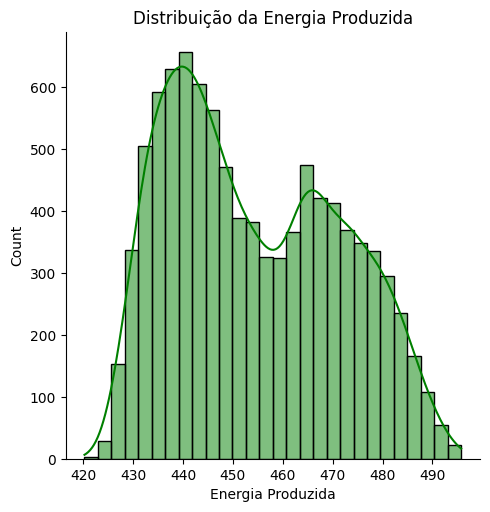

In [56]:
# Mostrando a distribuição da energia produzida no df
sns.displot(df['Energia Produzida'], kde=True, color='green')
plt.title('Distribuição da Energia Produzida')
plt.show()

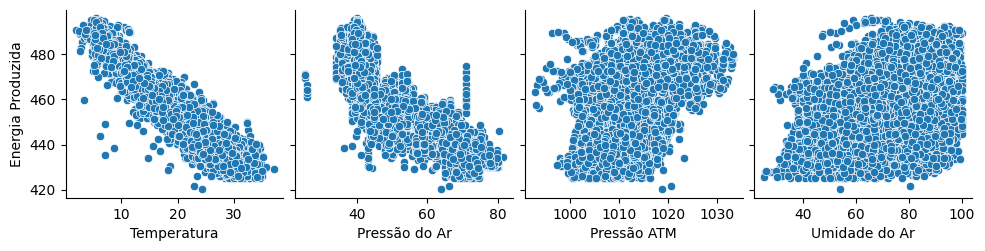

In [57]:
# Mostrando características de cada coluna que talvez possam explicar a energia produzida
sns.pairplot(df, y_vars='Energia Produzida', x_vars=['Temperatura','Pressão do Ar','Pressão ATM','Umidade do Ar'] )

# Treinando os Modelos

In [58]:
# Definindo X e y e aplicando o split
y = df['Energia Produzida']
X = df.drop(columns='Energia Produzida')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=250)

In [59]:
# Dataframe de treino pra usar na fórmula
df_train = pd.DataFrame(data= X_train)
df_train['Energia Produzida'] = y_train

In [60]:
# Adicionando uma constante
X_train = sm.add_constant(X_train)
X_train

,const,Temperatura,Pressão do Ar,Pressão ATM,Umidade do Ar
1211,1.0,11.02,40.71,1020.30,86.64
3199,1.0,31.28,75.08,1005.39,49.53
4202,1.0,8.55,36.25,1029.54,85.23
169,1.0,6.57,43.65,1018.24,74.47
8522,1.0,28.07,61.47,1008.68,64.83
...,...,...,...,...,...
7738,1.0,26.63,61.47,1008.18,69.00
2013,1.0,27.92,69.23,1013.21,44.43
7159,1.0,25.89,74.22,1007.43,81.55
2266,1.0,30.61,67.69,1004.97,47.46


In [61]:
X_train.columns

Index(['const', 'Temperatura', 'Pressão do Ar', 'Pressão ATM',
       'Umidade do Ar'],
      dtype='object')

In [62]:
# Criando alguns modelos de regreção para teste 

# Com todas as colunas
modelo_1 = sm.OLS(y_train,
                  X_train[['const', 'Temperatura', 'Pressão do Ar', 'Pressão ATM', 'Umidade do Ar']]).fit()
# Sem as colunas Temperatura e Pressão do Ar
modelo_2 = sm.OLS(y_train,
                  X_train[['const', 'Pressão ATM', 'Umidade do Ar']]).fit()
# Sem a coluna Temperatura
modelo_3 = sm.OLS(y_train,
                  X_train[['const', 'Pressão do Ar', 'Pressão ATM', 'Umidade do Ar']]).fit()
# Sem a coluna Pressão do Ar
modelo_4 = sm.OLS(y_train,
                  X_train[['const', 'Temperatura', 'Pressão ATM', 'Umidade do Ar']]).fit()

In [63]:
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:      Energia Produzida   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.297e+04
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:05:57   Log-Likelihood:                -19538.
No. Observations:                6697   AIC:                         3.909e+04
Df Residuals:                    6692   BIC:                         3.912e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           460.5261     11.389     40.436

In [64]:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:      Energia Produzida   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     2057.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:05:57   Log-Likelihood:                -26941.
No. Observations:                6697   AIC:                         5.389e+04
Df Residuals:                    6694   BIC:                         5.391e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -980.4404     28.177    -34.796

In [65]:
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Energia Produzida   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     9299.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:05:57   Log-Likelihood:                -23045.
No. Observations:                6697   AIC:                         4.610e+04
Df Residuals:                    6693   BIC:                         4.612e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -74.3684     17.429     -4.267

In [66]:
print(modelo_4.summary())

                            OLS Regression Results                            
Dep. Variable:      Energia Produzida   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.745e+04
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:05:57   Log-Likelihood:                -19879.
No. Observations:                6697   AIC:                         3.977e+04
Df Residuals:                    6693   BIC:                         3.979e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           497.7721     11.894     41.850

In [67]:
# R2 de cada modelo
print("R²")
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)
print("Modelo 4: ", modelo_4.rsquared)

R²
Modelo 1:  0.9321126785496586
Modelo 2:  0.38059976765553427
Modelo 3:  0.8065077036098535
Modelo 4:  0.9248247845925915


In [68]:
#Quantos parametros estão em cada modelo
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))
print(len(modelo_4.params))

5
3
4
4


# Testando o Modelo Inicialmente Escolhido

*   Eu escolhi o modelo 1 até esse momento, pois ele possui mais parametros e R2 foi o maior.
*   Entreteando há um multicolinearidade a ser investigada.

In [69]:
modelo_1.params

const            460.526137
Temperatura       -1.997830
Pressão do Ar     -0.229501
Pressão ATM        0.056782
Umidade do Ar     -0.162772
dtype: float64

In [70]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

In [71]:
# Prevendo com o modelo 1
predict_1 = modelo_1.predict(X_test[['const', 'Temperatura', 'Pressão do Ar', 'Pressão ATM', 'Umidade do Ar']])

In [72]:
# Qual o r² da previsão?
modelo_1.rsquared

0.9321126785496586

In [73]:
# Qual o R² do treino?
print("R²: ", r2_score(y_test, predict_1))

R²:  0.9202483049110741


In [74]:
# Dados que quero obter previsão
novo_dado = pd.DataFrame({ 'const': [1], 'Temperatura': [18.5], 'Pressão do Ar': [32.1], 'Pressão ATM': [1008.20], 'Umidade do Ar':[70.99]})

In [75]:
modelo_1.predict(novo_dado)[0]

461.89171578104947

# Investigado a Multicolimulticolinearidade e Escolhendo o Modelo Final a ser Usado



In [76]:
explicativas_1 = ['const', 'Temperatura', 'Pressão do Ar', 'Pressão ATM', 'Umidade do Ar']

explicativas_2 = ['const', 'Pressão ATM', 'Umidade do Ar']

explicativas_3 = ['const', 'Pressão do Ar', 'Pressão ATM', 'Umidade do Ar']

explicativas_4 = ['const', 'Temperatura', 'Pressão ATM', 'Umidade do Ar']

In [77]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1
vif_1["vif"] = [ variance_inflation_factor(X_train[explicativas_1], i ) for i in range(len(explicativas_1))]
vif_1

,variavel,vif
0,const,43351.439046
1,Temperatura,6.047881
2,Pressão do Ar,3.977541
3,Pressão ATM,1.445375
4,Umidade do Ar,1.725387


In [78]:
# VIF 2
vif_2 = pd.DataFrame()
vif_2['variavel'] = explicativas_2
vif_2["vif"] = [ variance_inflation_factor(X_train[explicativas_2], i ) for i in range(len(explicativas_2))]
vif_2

,variavel,vif
0,const,29092.580146
1,Pressão ATM,1.008318
2,Umidade do Ar,1.008318


In [79]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3
vif_3["vif"] = [ variance_inflation_factor(X_train[explicativas_3], i ) for i in range(len(explicativas_3))]
vif_3

,variavel,vif
0,const,35628.140916
1,Pressão do Ar,1.315454
2,Pressão ATM,1.199214
3,Umidade do Ar,1.107839


In [80]:
# VIF 4
vif_4 = pd.DataFrame()
vif_4['variavel'] = explicativas_4
vif_4["vif"] = [ variance_inflation_factor(X_train[explicativas_4], i ) for i in range(len(explicativas_4))]
vif_4

,variavel,vif
0,const,42706.038289
1,Temperatura,2.000158
2,Pressão ATM,1.421464
3,Umidade do Ar,1.512429


*   Considerando a Multicolimulticolinearidade apresentada modelo 1, o melhor modelo a se usar seria o 2 ou 3 ou 4.
*   Devido quantidade de parametros do modelo 3 ser maior que os outros, eu escolho ele como melhor opção.


In [81]:
# Treinando o modelo 3
predict_3 = modelo_3.predict(X_test[['const', 'Pressão do Ar', 'Pressão ATM', 'Umidade do Ar']])

In [82]:
# Qual o r² da previsão?
modelo_3.rsquared

0.8065077036098535

In [83]:
# Qual o R² do treino?
print("R²: ", r2_score(y_test, predict_3))

R²:  0.7973987261789112


In [84]:
# Dados que quero obter previsão sem a temperatura para o modelo 3
novo_dado_3 = pd.DataFrame({ 'const': [1], 'Pressão do Ar': [32.1], 'Pressão ATM': [1008.20], 'Umidade do Ar':[70.99]})

In [85]:
# Comparando os 2 modelos treinados
print("Valores de Energia Obtida no Modelo Inicial 1:", modelo_1.predict(novo_dado)[0])
print("Valores de Energia Obtida no Modelo Final 3:", modelo_3.predict(novo_dado_3)[0])

Valores de Energia Obtida no Modelo Inicial 1: 461.89171578104947
Valores de Energia Obtida no Modelo Final 3: 473.61577083844446


# Análise dos Resíduos do Modelo Final

In [86]:
# Prevendo os valores do treino X_traind do modelo 3
y_previsto_train = modelo_3.predict(X_train[explicativas_3])

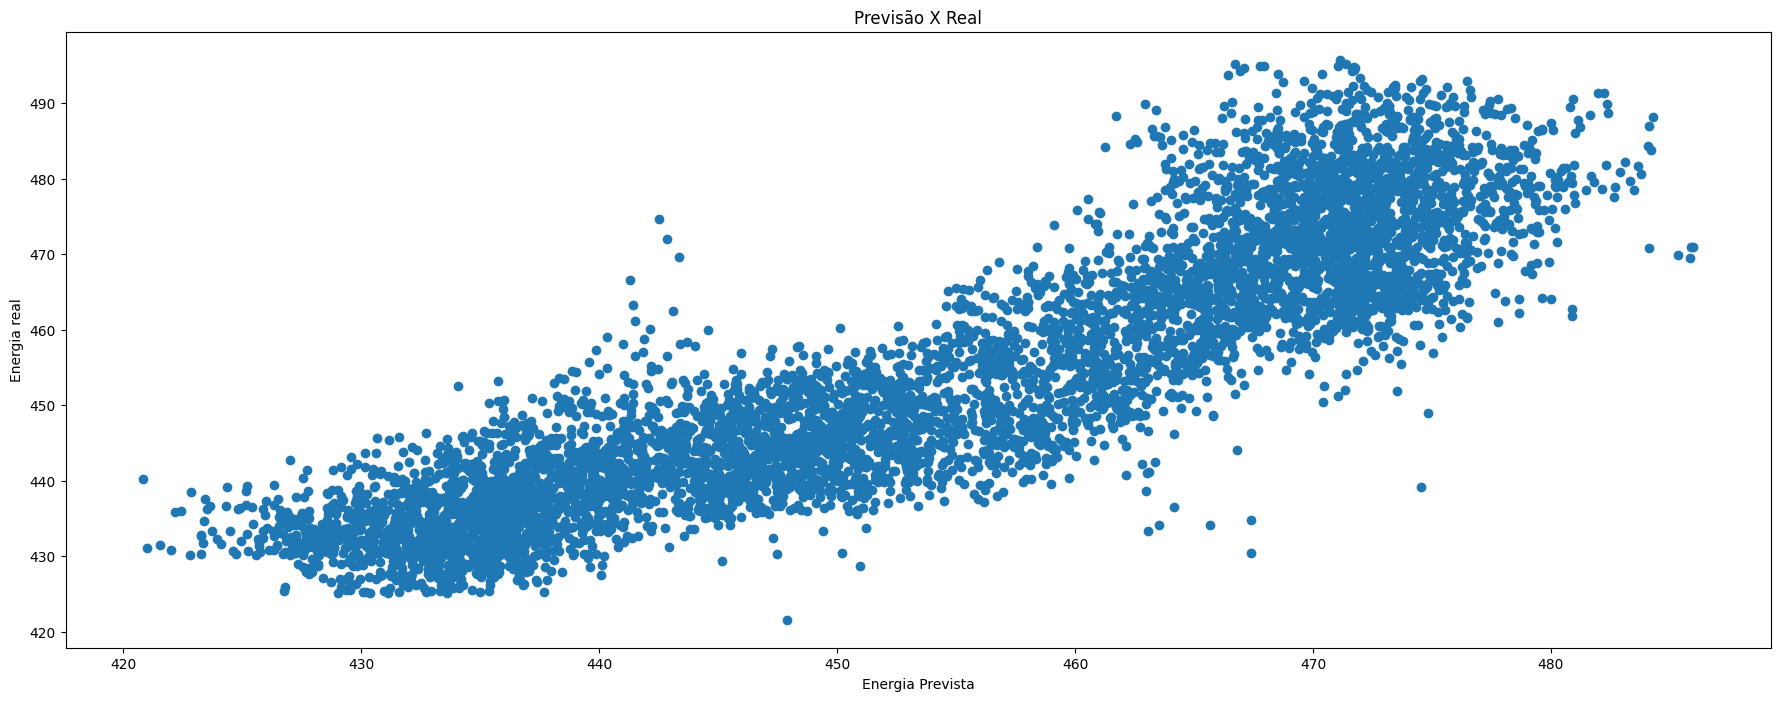

In [87]:
plt.figure(figsize=(22, 8))
plt.scatter(y_previsto_train, y_train)
plt.title('Previsão X Real')
plt.xlabel('Energia Prevista')
plt.ylabel('Energia real')
plt.show()

Existe uma tendência clara: conforme a previsão aumenta, o valor real também aumenta. -> Indica que o modelo está pegando o padrão geral.
Os pontos estão espalhados em torno da linha ideal, ou seja, o modelo não é perfeito —> há erros de previsão.
Quanto maior a energia prevista, mais espalhados ficam os pontos -> possível problema de heterocedasticidade.